# Кластеризация и уменьшение размерности

Подготовлено на основе [материалов с сайта Коротеева М.В.](https://koroteev.site/ml/)

## Кластеризация

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score,recall_score,accuracy_score,fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin
import warnings
import time
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

1.1 Загрузите [датасет](https://github.com/koroteevmv/ML_course/blob/main/ML6.1_clustering/data/Mall_Customers.csv). Приведите описательную статистику. Преобразуйте все нечисловые характеристики в числовые. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score. 

In [8]:
df = pd.read_csv('Mall_Customers.csv');df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

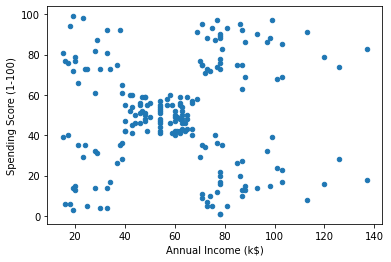

In [12]:
df.plot.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

1.2 Определите наилучшее число кластеров на основе созданной визуализации. Обучите модель К-средних и предскажите кластер для каждого объекта из датасета.

k = 5

1.3 Постройте графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score. Раскрасьте точки в соответствии с номером из кластера.

In [22]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20)
k_means.fit(df)
labels = k_means.labels_

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

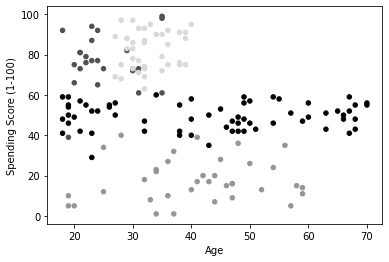

In [23]:
df.plot.scatter(x = 'Age', y = 'Spending Score (1-100)',c = labels )

1.4 Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера

C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


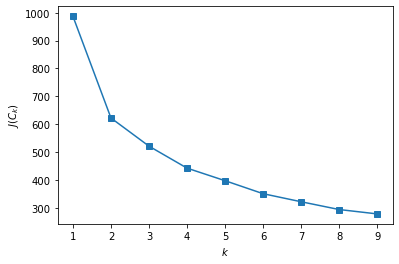

In [27]:
import numpy as np
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [ ]:
# судя по визуализации - оптимальное число кластера 2 либо 3,
# тк дальше уменьшение инерции происходит с меньшей скорость

1.5 Используйте другие алгоритмы кластеризации, реализованные в `sklearn`. Визуализируйте результат.

In [46]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
labels = model.fit_predict(df)

In [47]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

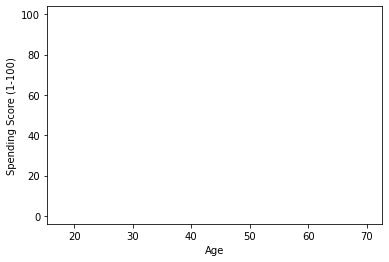

In [42]:
df.plot.scatter(x = 'Age', y = 'Spending Score (1-100)',c = labels )

In [57]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
model.fit(df)
labels = model.labels_

In [58]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

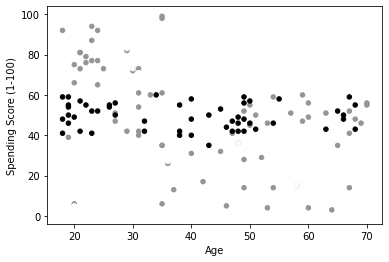

In [59]:
df.plot.scatter(x = 'Age', y = 'Spending Score (1-100)',c = labels )

## Уменьшение размерности

2.1 Загрузите [датасет](https://raw.githubusercontent.com/k8xu/credit-risk-classification/master/credit_data.csv). Приведите описательную статистику. Преобразуйте все нечисловые характеристики в числовые. Заполните пропуски. Разделите данные на тестовую и обучающую выборки.

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/k8xu/credit-risk-classification/master/credit_data.csv',\
                 index_col = 'Unnamed: 0')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [92]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [93]:
from sklearn.preprocessing import LabelEncoder
for column in ['Sex','Job','Housing','Saving accounts','Checking account','Purpose','Risk']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [94]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,3,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


2.2 Обучите модель Random Forest для предсказания переменной `Risk`. Оцените полученную модель с помощью метрик.

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [96]:
y = df['Risk']
X = df.drop('Risk', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [97]:
models = ['RandomForestClassifier()']
metrics = {}
for model in models:
    print(model)
    pipeline = Pipeline([
                         ('model', eval(model))])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    stop = time.time()

    metrics[model] = {'accuracy':accuracy_score(y_test, y_pred),
                         'precision':precision_score(y_test, y_pred, average='weighted'),
                         'recall':recall_score(y_test, y_pred,average='weighted'),
                         'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
    print(metrics[model])
    
    y_pred = pipeline.predict(X_train)
    
    metrics[model] = {'accuracy':accuracy_score(y_train, y_pred),
                         'precision':precision_score(y_train, y_pred, average='weighted'),
                         'recall':recall_score(y_train, y_pred,average='weighted'),
                         'f1':fbeta_score(y_train, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_train, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_train, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
                                        
    print(metrics[model])

RandomForestClassifier()
{'accuracy': 0.73, 'precision': 0.7124855576951563, 'recall': 0.73, 'f1': 0.7160718515594158, 'f0.5': 0.7124795230777026, 'f2': 0.7233449659224793, 'time': 0.12402772903442383}
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'f0.5': 1.0, 'f2': 1.0, 'time': 0.12402772903442383}


2.3 Понизьте размерность данных до 2 с помощью метода главных компонент. Обучите модель Random Forest, используя данные после уменьшения размерности, и оцените ее эффективность с помощью метрик.

In [99]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [101]:
models = ['RandomForestClassifier()']
metrics = {}
for model in models:
    print(model)
    pipeline = Pipeline([
                         ('model', eval(model))])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    stop = time.time()

    metrics[model] = {'accuracy':accuracy_score(y_test, y_pred),
                         'precision':precision_score(y_test, y_pred, average='weighted'),
                         'recall':recall_score(y_test, y_pred,average='weighted'),
                         'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
    print(metrics[model])
    
    y_pred = pipeline.predict(X_train)
    
    metrics[model] = {'accuracy':accuracy_score(y_train, y_pred),
                         'precision':precision_score(y_train, y_pred, average='weighted'),
                         'recall':recall_score(y_train, y_pred,average='weighted'),
                         'f1':fbeta_score(y_train, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_train, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_train, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
                                        
    print(metrics[model])

RandomForestClassifier()
{'accuracy': 0.675, 'precision': 0.6547219085262563, 'recall': 0.675, 'f1': 0.6620419693301048, 'f0.5': 0.6569011584606769, 'f2': 0.6691990655682648, 'time': 0.12369465827941895}
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'f0.5': 1.0, 'f2': 1.0, 'time': 0.12369465827941895}


2.4 Постройте график зависимости точности модели от размерности данных.

In [116]:
metrics = {}
for i in range(1,10):
    y = df['Risk']
    X = df.drop('Risk', axis = 1)
    pca = PCA(n_components=i)
    X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    models = ['RandomForestClassifier()']
    for model in models:
        print(model)
        pipeline = Pipeline([
                             ('model', eval(model))])

        start = time.time()
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        stop = time.time()

        metrics[i] = {'accuracy':accuracy_score(y_test, y_pred),
                             'precision':precision_score(y_test, y_pred, average='weighted'),
                             'recall':recall_score(y_test, y_pred,average='weighted'),
                             'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                             'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                             'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                             'time' : (stop-start)}
        print(metrics[i])

RandomForestClassifier()
{'accuracy': 0.53, 'precision': 0.5516506250691449, 'recall': 0.53, 'f1': 0.539719669117647, 'f0.5': 0.5466176635618898, 'f2': 0.5336159924519401, 'time': 0.1458587646484375}
RandomForestClassifier()
{'accuracy': 0.665, 'precision': 0.6369996986136227, 'recall': 0.665, 'f1': 0.6463303420643068, 'f0.5': 0.6394405628280456, 'f2': 0.6565413320313279, 'time': 0.15203309059143066}
RandomForestClassifier()
{'accuracy': 0.705, 'precision': 0.6829430379746836, 'recall': 0.705, 'f1': 0.6885595549521508, 'f0.5': 0.6836723732126676, 'f2': 0.6972934394866379, 'time': 0.14603281021118164}
RandomForestClassifier()
{'accuracy': 0.72, 'precision': 0.6957784778643675, 'recall': 0.72, 'f1': 0.6980482456140352, 'f0.5': 0.6937100596402093, 'f2': 0.7092965722951967, 'time': 0.18404126167297363}
RandomForestClassifier()
{'accuracy': 0.73, 'precision': 0.7108651633686149, 'recall': 0.73, 'f1': 0.7138, 'f0.5': 0.7101416278546324, 'f2': 0.7221617208682235, 'time': 0.18404078483581543}


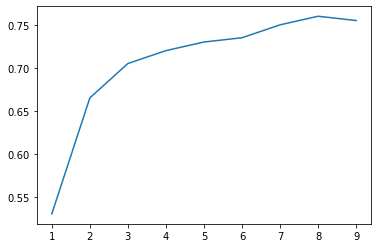

In [117]:
plt.plot(range(1,10),[metrics[i]['accuracy'] for i in metrics.keys()])

2.5 Используя модель из 2.2, получите прогнозы для всех объектов. Используя метод главных компонент, понизьте размерность данных до 2. Визуализируйте полученные точки на плоскости и раскрасьте их в цвет, соответствующих предсказанному классу.

In [126]:
metrics = {}
i = 2
y = df['Risk']
X = df.drop('Risk', axis = 1)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
models = ['RandomForestClassifier()']
for model in models:
    print(model)
    pipeline = Pipeline([
                         ('model', eval(model))])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X)
    stop = time.time()

    metrics[i] = {'accuracy':accuracy_score(y, y_pred),
                         'precision':precision_score(y, y_pred, average='weighted'),
                         'recall':recall_score(y, y_pred,average='weighted'),
                         'f1':fbeta_score(y, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
    print(metrics[i])

RandomForestClassifier()
{'accuracy': 0.932, 'precision': 0.9315079365079364, 'recall': 0.932, 'f1': 0.9313064594463331, 'f0.5': 0.931316389959871, 'f2': 0.9316185503685506, 'time': 0.13903069496154785}


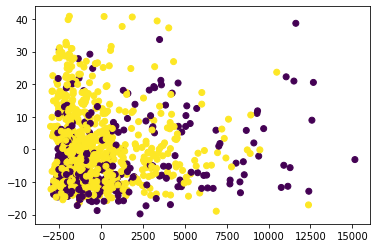

In [128]:
plt.scatter(X[:,0],X[:,1], c = y_pred)

2.6 Повторите 2.5, используя алгоритм t-SNE.

In [132]:
from sklearn.manifold import TSNE

In [133]:
metrics = {}
i = 2
y = df['Risk']
X = df.drop('Risk', axis = 1)
TSNE = TSNE(n_components=2)
X = TSNE.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
models = ['RandomForestClassifier()']
for model in models:
    print(model)
    pipeline = Pipeline([
                         ('model', eval(model))])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X)
    stop = time.time()

    metrics[i] = {'accuracy':accuracy_score(y, y_pred),
                         'precision':precision_score(y, y_pred, average='weighted'),
                         'recall':recall_score(y, y_pred,average='weighted'),
                         'f1':fbeta_score(y, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
    print(metrics[i])

RandomForestClassifier()
{'accuracy': 0.918, 'precision': 0.9172358171374616, 'recall': 0.918, 'f1': 0.9173399891649253, 'f0.5': 0.9172090762155758, 'f2': 0.9176709321116561, 'time': 0.17103886604309082}


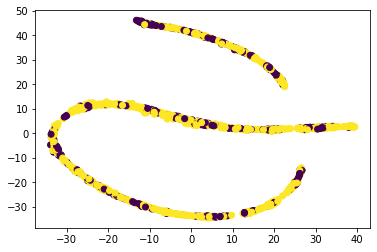

In [134]:
plt.scatter(X[:,0],X[:,1], c = y_pred)